# Dimensionality and its reduction

## The curse of dimensionality

In general, our vector of attributes will have multiple dimensions. The more dimensions, the more attributes, i.e. the more we know about each object. 

**BUT**, when dimensionality increases, the volume of the space increases so fast that the available data becomes sparse.

Imagine we have a $D$ dimensional space. If we divide a region of a space into regular cells, then the number of such cells grows exponentially with the dimensionality of the space. The number of cells will be $N^D$, where $N$ is the size of the grid per dimension.

![Dimensionality_grid](images_04/Dimensionality_grid.png)

This means that if we want to uniformly populate a $D$ dimensional space, we will need an exponential number of points!

### Example 1

Multivariate Gaussian.

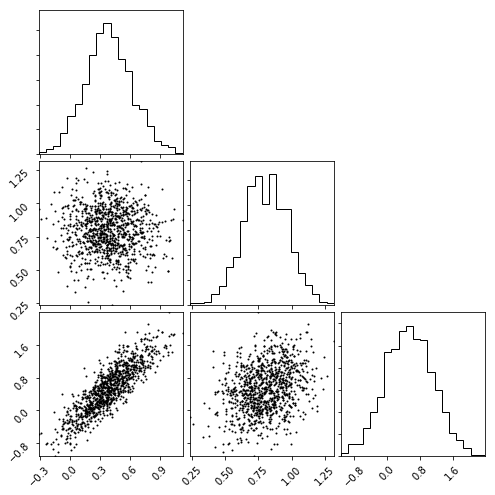

[[ 0.05924953  0.0007548   0.12890635]
 [ 0.0007548   0.02912818  0.03493439]
 [ 0.12890635  0.03493439  0.3723646 ]]
[[ 0.05424692 -0.00132739  0.11522017]
 [-0.00132739  0.02784471  0.02912739]
 [ 0.11522017  0.02912739  0.33238827]]


In [12]:
import numpy as np
import pylab as pl
import corner as cn

D = 3
N = 1000

# We will create a multivariate normal distribution
np.random.seed(0)
A = (np.random.random((D, D)) - 0.5)
covariance = np.dot(A,A.transpose())
mean = np.random.random(D)

samples_mvn = np.random.multivariate_normal(mean, covariance, N)
pl.clf()
figure = cn.corner(samples_mvn, plot_contours = False, bins = 20, plot_datapoints = True,
                data_kwargs = {"alpha": 1}, no_fill_contours = True, plot_density = False)
pl.show()

print covariance
C = np.dot((samples_mvn-mean).transpose(), samples_mvn-mean)/(N-1)
print C

### Example 2:

The digits dataset.


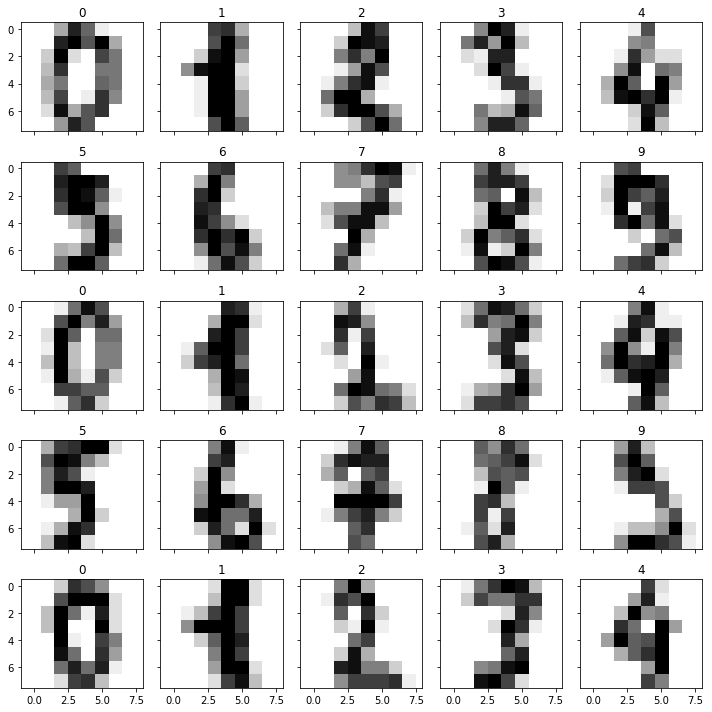

In [2]:
from sklearn.datasets import load_digits
import pylab as pl

digits = load_digits()
N_pl = 5

pl.clf()
f, axs = pl.subplots(N_pl, N_pl, sharex='col', sharey='row', figsize=(N_pl*2, N_pl*2))
axs = axs.flatten()
for i in range(N_pl*N_pl):
    axs[i].imshow(digits.images[i], cmap=pl.cm.gray_r, interpolation='nearest')
    axs[i].set_title(str(digits.target[i]))
pl.tight_layout()
pl.show()

In [3]:
print digits.images.shape
print digits.data.shape

(1797, 8, 8)
(1797, 64)


(1797, 61)


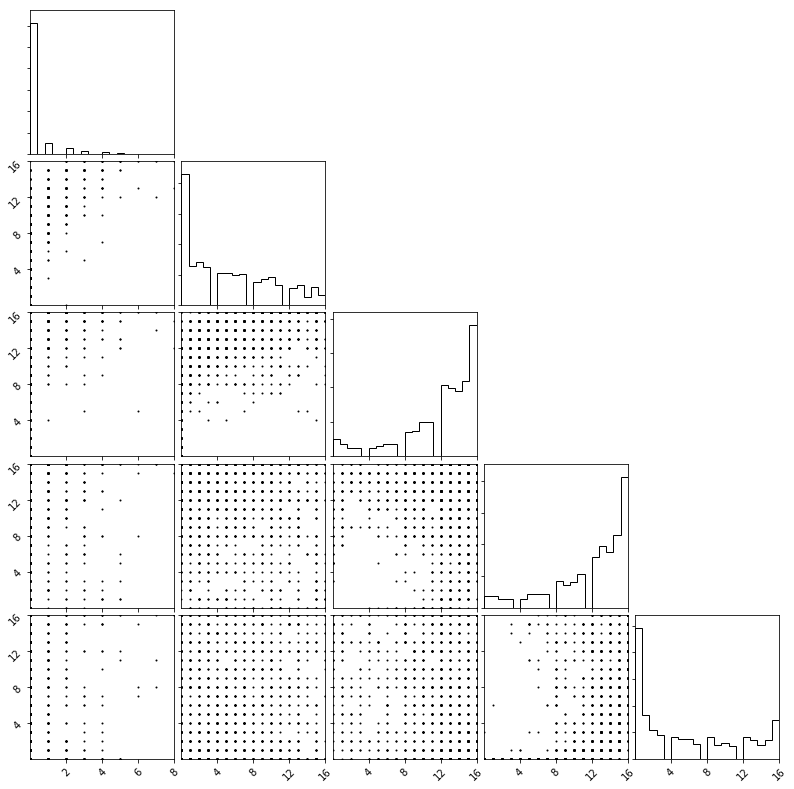

In [33]:
no_zeros = digits.data[:, (digits.data.sum(axis=0) != 0)]
print no_zeros.shape

pl.clf()
figure = cn.corner(no_zeros[:, :5], plot_contours = False, bins = 20, plot_datapoints = True,
                data_kwargs = {"alpha": 1}, no_fill_contours = True, plot_density = False)
pl.show()


**Solution**: reduce data dimensionality.

## Dimensionality reduction

**Idea**: Project the high-dimensional data onto a lower-dimensional subspace that best “fits” the data.

![Dimensionality Reduction](http://winedarksea.org/wp-content/uploads/2015/07/orthoregdemo_02.png)

### Linear Models

Linear methods assume data mostly comes from a hyperplane and try to find the intrinsic dimensionality.

![Linear](https://upload.wikimedia.org/wikipedia/commons/6/6f/Friedmans_mars_linear_model.png)

But why would we want to reduce the dimensionality of a problem?

* Visualization
* Compression
* Infering: Regression / Classification / Clustering / Density estimation



## Principal Component Analysis

### But first....Linear Algebra

And you thoght you would never need it again.

![Never](images_04/meme.jpg)

Consider two vectors: $\boldsymbol{x}$ and $\boldsymbol{u}$ and a matrix $\boldsymbol{S}$.
* The vector projection of $\boldsymbol{x}$ on (or onto) $\boldsymbol{u}$ is the orthogonal projection of $\boldsymbol{x}$ onto a straight line parallel to $\boldsymbol{u}$.
\begin{equation}
\boldsymbol{x}_1 = x_1\frac{\boldsymbol{u}}{|\boldsymbol{u}|}
\end{equation}
* $x_1$ is called the scalar proyection of $\boldsymbol{x}$ on (or onto) $\boldsymbol{u}$
\begin{equation}
x_1 = \boldsymbol{x}_1\frac{\boldsymbol{u}}{|\boldsymbol{u}|}
\end{equation}
* A unit vector is a vector of length 1: $|\boldsymbol{u}| = 1$.
* $\boldsymbol{u}$ _eingevector_ of a matrix $\boldsymbol{S}$ and $\lambda$ is an _eigenvalue_ of such eigenvector if $\boldsymbol{S}\boldsymbol{u} = \lambda\boldsymbol{u}$.

* Consider a data-set $\{\boldsymbol{x}_i\}_{i=1}^N$ of observations, each of dimensionality $D$.
* We want to project the data onto a space of lower dimensionality $M<D$.
* In this new $M$ space we want to maximize the variance (i.e. remove dimensions where there is no variance).

### Example: 
2D multivariate normal into a 1-D

1.41421356237 0.585786437627


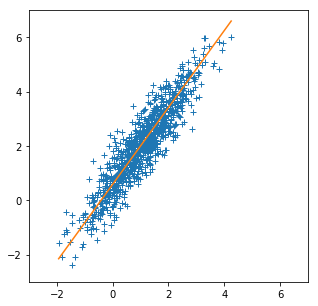

In [37]:
covariance = [[1., 1.3], [1.3, 2.]]
#covariance = [[0.5, 0.7], [0.7, 1.]]
mean = [1, 2]
N = 1000
samples = np.random.multivariate_normal(mean, covariance, N)

# lets define a linear model
m = np.sqrt(covariance[1][1]/ covariance[0][0])
y0 = mean[1]-m*mean[0]
print m, y0
x = np.linspace (samples[:, 0].min(), samples[:, 0].max(), 30)
y = x * m + y0

pl.clf()
pl.figure(figsize = (5,5))
pl.plot (samples[:, 0], samples[:, 1], "+")
pl.plot (x, y)
pl.xlim ([-3, 7])
pl.ylim ([-3, 7])
pl.show()


* How do we proyect to this one dimensional space? 
* Define a unit vector $\boldsymbol{u}_1$.
 * unit vector: $\boldsymbol{u}_1^\top\boldsymbol{u}_1=1$
* Each datapoint $\boldsymbol{x}_i$ is then proyected into $\boldsymbol{u}_1$.
 * $\boldsymbol{u}_1^\top\boldsymbol{x}_i$.


proyection variance:  2.02837805477
y variance:  2.02837805477


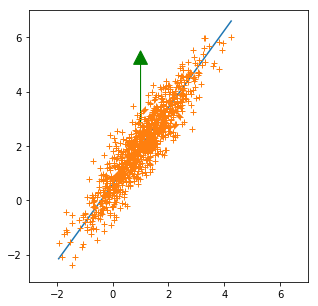

In [38]:
u1 = np.array([0, 1])
u1 = u1/np.sqrt((u1*u1).sum())

p = np.tensordot (u1, samples, axes = (-1,-1))

print "proyection variance: ", p.var()
print "y variance: ", samples[:, 1].var()

pl.clf()
pl.figure(figsize = (5,5))
pl.plot (x, y)
pl.plot (samples[:, 0], samples[:, 1], "+")
pl.arrow(mean[0], mean[1], u1[0]*3, u1[1]*3, head_width=0.5, head_length=0.5, fc='g', ec='g')
pl.xlim ([-3, 7])
pl.ylim ([-3, 7])
pl.show()


So, what's the proyection of maximum variance?

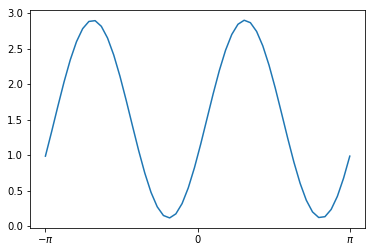

In [39]:
theta = np.linspace (-np.pi, np.pi, 50)
var = []
for t in theta:
    u1 = np.array([np.cos(t), np.sin(t)])
    p = np.tensordot (u1, samples, axes = (-1,-1))
    var.append(p.var())

pl.clf()
ax = pl.axes()
pl.plot(theta, var)
ax.set_xticks([-np.pi, 0., np.pi])
ax.set_xticklabels([r"$-\pi$", "0", r"$\pi$"])

pl.show()

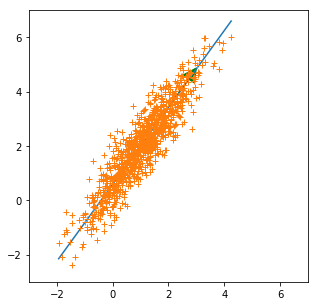

In [40]:
theta_max = theta[np.argmax(var)]
u1 = np.array([np.cos(theta_max), np.sin(theta_max)])

pl.clf()
pl.figure(figsize = (5,5))
pl.plot (x, y)
pl.plot (samples[:, 0], samples[:, 1], "+")
pl.arrow(mean[0], mean[1], u1[0]*3, u1[1]*3, head_width=0.5, head_length=0.5, fc='g', ec='g')
pl.xlim ([-3, 7])
pl.ylim ([-3, 7])
pl.show()


* Of course, this is not the optimal way of adressing the problem!
* When projecting onto $\boldsymbol{u}_1$, the mean of the projected data is $\boldsymbol{u}_1^\top\bar{\boldsymbol{x}}$, where $\bar{\boldsymbol{x}}$ is the sample set mean given by
\begin{equation}
\bar{\boldsymbol{x}} = \frac{1}{N}\sum_i\boldsymbol{x}_i
\end{equation}
* The covariance matrix of the data is 
\begin{equation}
\boldsymbol{S} = \frac{1}{N-1}\sum_i(\boldsymbol{x}_i-\bar{\boldsymbol{x}})(\boldsymbol{x}_i-\bar{\boldsymbol{x}})^\top
\end{equation}
* The variance of the projected data is given by $\boldsymbol{u}_1^\top\boldsymbol{S}\boldsymbol{u}_1$
* We now maximize the variance of the projected data $\boldsymbol{u}_1^\top\boldsymbol{S}\boldsymbol{u}_1$ with respect to $\boldsymbol{u}_1$ constrained to $\boldsymbol{u}_1^\top\boldsymbol{u}_1 = 1$.
\begin{equation}
\max_{\boldsymbol{u}_1} \left[\boldsymbol{u}_1^\top\boldsymbol{S}\boldsymbol{u}_1 + \lambda_1(1-\boldsymbol{u}_1^\top\boldsymbol{u}_1)\right]
\end{equation}
* By setting the derivative with respect to $\boldsymbol{u}_1$ equal to zero we get
\begin{equation}
\boldsymbol{S}\boldsymbol{u}_1 = \lambda_1\boldsymbol{u}_1
\end{equation}
* This means $\boldsymbol{u}_1$ must be an _eigenvector_ of $\boldsymbol{S}$.
* We left multiply by $\boldsymbol{u}_1^\top$ and get
\begin{equation}
\boldsymbol{u}_1^\top\boldsymbol{S}\boldsymbol{u}_1 = \lambda_1
\end{equation}
* Hence, the variance will be maximum when we set $\boldsymbol{u}_1$ equal to the eigenvector having the largest eigenvalue $\lambda_1$. This eigenvector is known as the first principal component.


mu =  [ 1.03809855  2.01839921]
S =  [[ 0.98535789  1.29296328]
 [ 1.29296328  2.03040846]]
l =  [ 0.11332707  2.90243928]
u =  [[-0.82906252  0.55915592]
 [ 0.55915592  0.82906252]]


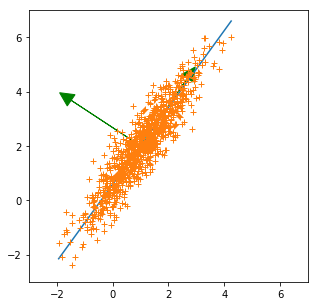

In [41]:
mu = samples.mean(axis = 0)
print "mu = ", mu
S = np.dot((samples - mu).transpose(),(samples - mu))/(N-1)
print "S = ", S
l, u = np.linalg.eigh (S) 
print "l = ", l
print "u = ", u

pl.clf()
pl.figure(figsize = (5,5))
pl.plot (x, y)
pl.plot (samples[:, 0], samples[:, 1], "+")
for i in range(len(l)):
    pl.arrow(mean[0], mean[1], u[i, 0]*3, u[i, 1]*3, head_width=0.5, head_length=0.5, fc='g', ec='g')
pl.xlim ([-3, 7])
pl.ylim ([-3, 7])
pl.show()

## PCA for high dimensional data

* Extending to higher dimensional data is straightforward.
* Consider a set of projections defined by a matrix $\boldsymbol{U}$ of size $D\times D$ such that the projected data is $\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{U}$.
* We will center the data by subtracting the mean and re-write the centered data as a $N\times D$ matrix $\boldsymbol{X}$.
* By doing this, we can rewrite the covariance matrix as
\begin{equation}
\boldsymbol{S} = \frac{1}{N-1}\boldsymbol{X}^\top\boldsymbol{X}
\end{equation}
* The projected covariance matrix can be written as
\begin{equation}
\boldsymbol{S}_u = \boldsymbol{U}^\top\boldsymbol{S}\boldsymbol{U}
\end{equation}
* Once again, we now maximize the variance of the projected data $\boldsymbol{u}_1^\top\boldsymbol{S}\boldsymbol{u}_1$ with respect to $\boldsymbol{u}_1$ constrained to $\boldsymbol{u}_1^\top\boldsymbol{u}_1 = 1$.
\begin{equation}
\max_{\boldsymbol{u}_1} \left[\boldsymbol{u}_1^\top\boldsymbol{S}\boldsymbol{u}_1 + \lambda_1(1-\boldsymbol{u}_1^\top\boldsymbol{u}_1)\right]
\end{equation}
* By setting the derivative with respect to $\boldsymbol{u}_1$ equal to zero we get
\begin{equation}
\boldsymbol{S}\boldsymbol{u}_1 = \lambda_1\boldsymbol{u}_1
\end{equation}
* This means $\boldsymbol{u}_1$ must be an _eigenvector_ of $\boldsymbol{S}$.
* We left multiply by $\boldsymbol{u}_1^\top$
\begin{equation}
\boldsymbol{u}_1^\top\boldsymbol{S}\boldsymbol{u}_1 = \lambda_1
\end{equation}
* The variance of the first principal component is maximized when $\lambda_1$ is the largest eigenvalue.
* The second (and further) principal components can be derived by applying the additional constraint that to the cost function that the principal components are uncorrelated ($\boldsymbol{u}_2^\top \boldsymbol{S} \boldsymbol{u}_1 = 0$).
* The columns of $\boldsymbol{U}$ are the eigenvectors of the principal components, and the diagonal values of $\boldsymbol{S}_u$ define the amount of variance contained within each component.
* Ordering the eigenvectors by their eigenvalue we can define the set of principal components.



In [42]:
S_u = np.dot(np.dot(u.transpose(), S), u)
print "S_u = "
print S_u


S_u = 
[[  1.13327075e-01  -2.22044605e-16]
 [ -2.22044605e-16   2.90243928e+00]]


### Efficient computation of principal components 

* One of the most direct methods for computing the PCA is through the eigenvalue decomposition of the covariance matrix
* This is equivalent to the singular value decomposition (SVD) of the data matrix itself.
* The scaled SVD can be written as
\begin{equation}
\boldsymbol{U}\boldsymbol{\Sigma} \boldsymbol{V}^\top = \frac{1}{\sqrt{N -1}} \boldsymbol{X}
\end{equation}
* The columns of $\boldsymbol{U}$ are the _left-singular vectors_, and the columns of $\boldsymbol{V}$ are the _right-singular vectors_. $\boldsymbol{\Sigma}$ is the _matrix of singular values_.
* $\boldsymbol{\Sigma}$ has a shape $R\times R$, where $R = min(N, D)$.
* $\boldsymbol{U}$ and $\boldsymbol{V}$ are $N\times R$ and $D\times R$ matrices respectively.
![SVD](http://www.astroml.org/_images/fig_svd_visual_1.png)
* Using this decomposition
\begin{equation}
\boldsymbol{S} = \boldsymbol{V}\boldsymbol{\Sigma}^2 \boldsymbol{V}^\top 
\end{equation}
* Also
\begin{eqnarray}
\boldsymbol{S} & = & \boldsymbol{U}\boldsymbol{U}^\top \boldsymbol{S} \boldsymbol{U}\boldsymbol{U}^\top \\
& = & \boldsymbol{U}\boldsymbol{S_u} \boldsymbol{U}^\top 
\end{eqnarray}
* This means that $\boldsymbol{V}$ correspond to the principal components, and the matrix of eigenvalues correspond to the square of the singular values $\boldsymbol{\Sigma}^2 = \boldsymbol{S_u}$.
* Thus the eigenvalue decomposition of $\boldsymbol{S}$, and therefore the principal components, can be computed from the SVD of $\boldsymbol{X}$, without explicitly constructing the matrix $\boldsymbol{S}_u$.

(1000, 2)
[ 9.46504319  3.43051731]
[[ 0.86955454 -0.49383692]
 [-0.49383692 -0.86955454]]


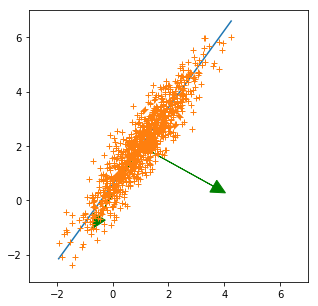

In [44]:
U, Sdiag, VT = np.linalg.svd (samples, full_matrices = False) 
V = VT[::-1].T
print U.shape
print np.sqrt(Sdiag)
print V

pl.clf()
pl.figure(figsize = (5,5))
pl.plot (x, y)
pl.plot (samples[:, 0], samples[:, 1], "+")
for i in range(len(l)):
    pl.arrow(mean[0], mean[1], V[i, 0]*3, V[i, 1]*3, head_width=0.5, head_length=0.5, fc='g', ec='g')
pl.xlim ([-3, 7])
pl.ylim ([-3, 7])
pl.show()

The SVD formalism can also be used to quickly see the relationship between the covariance matrix $\boldsymbol{S}$ , and the correlation matrix,
\begin{eqnarray}
\boldsymbol{M}_x & = & \frac{1}{N-1}\boldsymbol{X}\boldsymbol{X}^\top\\
& = & \boldsymbol{U}\boldsymbol{\Sigma}^2\boldsymbol{U}^\top
\end{eqnarray}
* The left singular vectors, $\boldsymbol{U}$, turn out to be the eigenvectors of the correlation matrix, which has eigenvalues identical to those of the covariance matrix.
* Furthermore, the orthonormality of the matrices $\boldsymbol{U}$ and $\boldsymbol{V}$ means that if $\boldsymbol{U}$ is known, $\boldsymbol{V}$ (and therefore R) can be quickly determined:
\begin{equation}
\boldsymbol{V} = \frac{1}{\sqrt{N-1}}\boldsymbol{X}^\top\boldsymbol{U}\boldsymbol{\Sigma}^{-1}
\end{equation}
* Thus we have three equivalent ways of computing the principal components R and the eigenvalues CX: 
 * the eigenvalue decomposition of $\boldsymbol{S}$
 * the SVD of $\boldsymbol{X}$
 * the eigenvalue decomposition of $\boldsymbol{M}_x$.

* The optimal procedure will depend on the relationship between the data size $N$ and the dimensionality $D$. 
 * If $N ≫ D$ , then using the eigenvalue decomposition of the $D × D$ covariance matrix $\boldsymbol{S}$ will in general be more efficient. 
 * If $D ≫ N$, then using the N × N correlation matrix $\boldsymbol{M}_x$ will be more efficient. 
 * In the intermediate case, direct computation of the SVD of $\boldsymbol{X}$ will be the most efficient route.

### Example: multivariate Normal

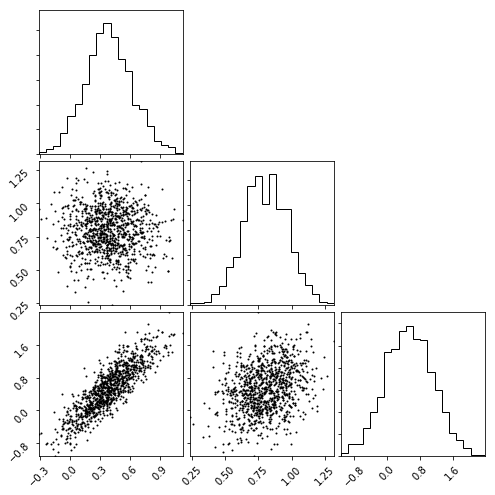

In [45]:
D = 3
N = 1000

# We will create a multivariate normal distribution
np.random.seed(0)
A = (np.random.random((D, D)) - 0.5)
covariance = np.dot(A,A.transpose())
mean = np.random.random(D)

samples_mvn = np.random.multivariate_normal(mean, covariance, N)
pl.clf()
figure = cn.corner(samples_mvn, plot_contours = False, bins = 20, plot_datapoints = True,
                data_kwargs = {"alpha": 1}, no_fill_contours = True, plot_density = False)
pl.show()



[ 0.90730383  0.07736169  0.01533449]


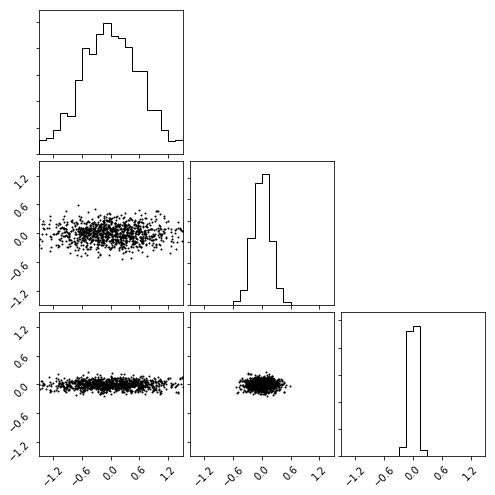

In [46]:
from sklearn.decomposition import PCA

pca = PCA ()
pca.fit (samples_mvn)
comp = pca.transform(samples_mvn)
print pca.explained_variance_ratio_

pl.clf()
figure = cn.corner(comp, plot_contours = False, bins = 20, plot_datapoints = True,
                data_kwargs = {"alpha": 1}, no_fill_contours = True, plot_density = False,
                  range = [[-1.5, 1.5]]*D)
pl.show()



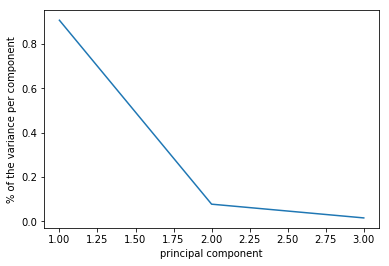

In [47]:
pl.clf()
pl.plot(np.arange(D) + 1, pca.explained_variance_ratio_)
pl.xlabel("principal component")
pl.ylabel("% of the variance per component")
pl.show()

### Example over the digits database

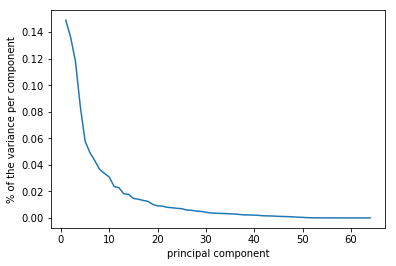

In [48]:
pca = PCA ()
pca.fit (digits.data)

pl.clf()
pl.plot(np.arange(len(pca.explained_variance_ratio_)) + 1, pca.explained_variance_ratio_)
pl.xlabel("principal component")
pl.ylabel("% of the variance per component")
pl.show()


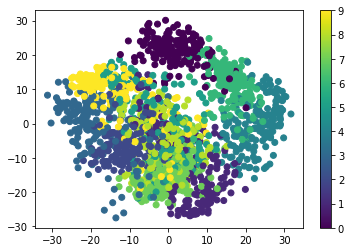

In [49]:
pca = PCA (n_components = 2)
pca.fit (digits.data)
proj = pca.transform(digits.data)

pl.clf()
pl.scatter(proj[:, 0], proj[:, 1], c = digits.target)
pl.colorbar()
pl.show()



## Nonnegative Matrix Factorization (NMF)

* One of the challenges in interpreting PCA bases comes from the fact that the eigenvectors are defined relative to the mean data vector.
* This results in principal components that can be positive or negative.
* In contrast, for many data sets we have a priori knowledge that a data vector can be represented by a linear sum of positive components (e.g. images).
* NMF assumes that any data matrix can be factored into two _nonnegative_ matrices, $\boldsymbol{W}$ and $\boldsymbol{Y}$, such that $\boldsymbol{X} = \boldsymbol{W}\boldsymbol{Y}$
* nonnegative: all elements in the matrix are nonnegative.
* $\boldsymbol{W}\boldsymbol{Y}$ is an approximation for $\boldsymbol{X}$.
* Recall $\boldsymbol{X}$ has dimmensions $N\times D$.
* $\boldsymbol{W}$ and $\boldsymbol{Y}$ have dimensions $N\times P$ and $P\times D$ respectively.
* $\boldsymbol{W}$ and $\boldsymbol{Y}$ can be derived by minimizing the error $||\boldsymbol{X} - \boldsymbol{W}\boldsymbol{Y}||^2$, leading to the update rule:
\begin{eqnarray}
\boldsymbol{W}_{k, i} & = & \boldsymbol{W}_{k,i}\frac{[\boldsymbol{X}\boldsymbol{Y}^\top]_{k, i}}{[\boldsymbol{W}^\top\boldsymbol{Y}\boldsymbol{Y}^\top]_{k,i}}\\
\boldsymbol{Y}_{i, n} & = & \boldsymbol{Y}_{k,i}\frac{[\boldsymbol{W}^\top\boldsymbol{X}^\top]_{i, n}}{[\boldsymbol{W}^\top\boldsymbol{W}\boldsymbol{Y}]_{i, n}}
\end{eqnarray}
* This iterative process does not guarantee nonlocal minima. 
* With random initialization and cross-validation the solutions for the NMF bases are, however, often appropriate.


### Example: The digits dataset

In [50]:
from sklearn.decomposition import NMF

nmf = NMF (n_components = 2)
#nmf = NMF ()
nmf.fit(digits.data)
proj = nmf.transform (digits.data)


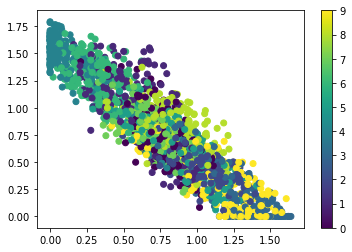

In [51]:
pl.clf()
pl.scatter(proj[:, 0], proj[:, 1], c = digits.target)
pl.colorbar()
pl.show()

In [52]:
error = []
for n in range (2, digits.data.shape[1], 4):
    print n
    nmf = NMF (n_components = n)
    nmf.fit(digits.data)
    error.append(nmf.reconstruction_err_)



2
6
10
14
18
22
26
30
34
38
42
46
50
54
58
62


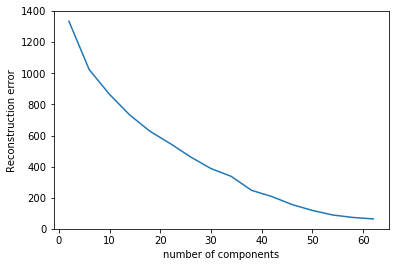

In [53]:
pl.clf()
pl.plot(range (2, digits.data.shape[1], 4), error, label = "NMF")
pl.xlabel ("number of components")
pl.ylabel ("Reconstruction error")
pl.show()

### Example: [faces](http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py)

In [54]:
from sklearn.datasets import fetch_olivetti_faces
rng = np.random.seed(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)


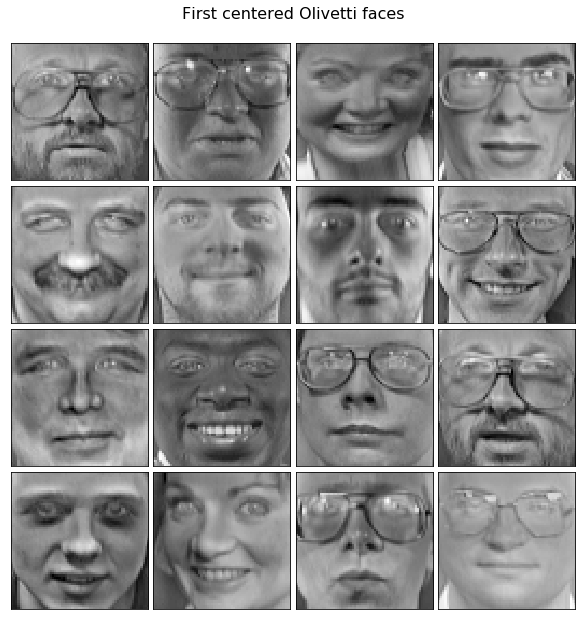

In [58]:
n_row, n_col = 4, 4
n_components = n_row * n_col
image_shape = (64, 64)

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    pl.clf()
    pl.figure(figsize=(2. * n_col, 2.26 * n_row))
    pl.suptitle(title, size=16)
    for i, comp in enumerate(images):
        pl.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        pl.imshow(comp.reshape(image_shape), cmap=pl.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        pl.xticks(())
        pl.yticks(())
    pl.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    pl.show()


plot_gallery("First centered Olivetti faces", faces_centered[:n_components])



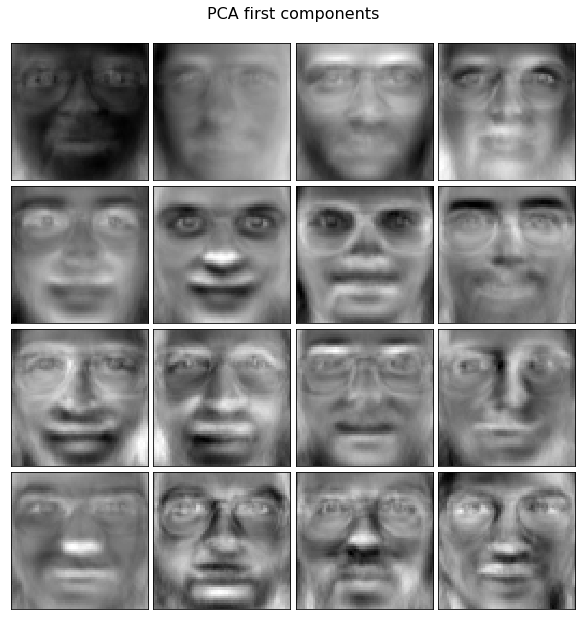

In [59]:
#PCA first

pca = PCA(n_components=n_components)
pca.fit(faces)
comp = pca.components_

plot_gallery('PCA first components',comp[:n_components])

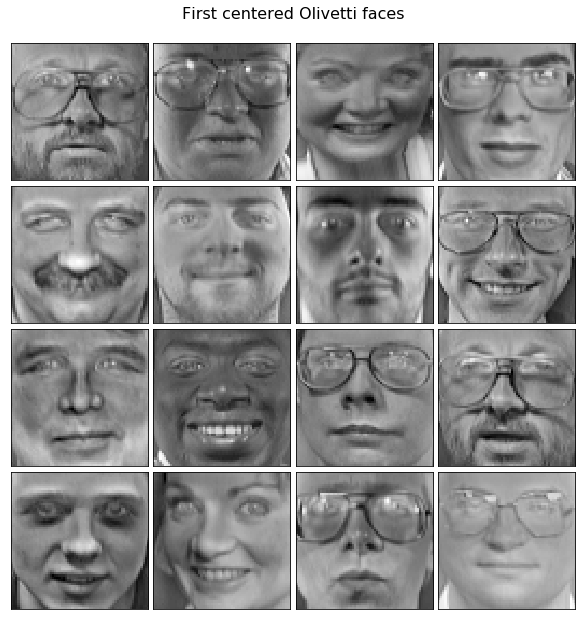

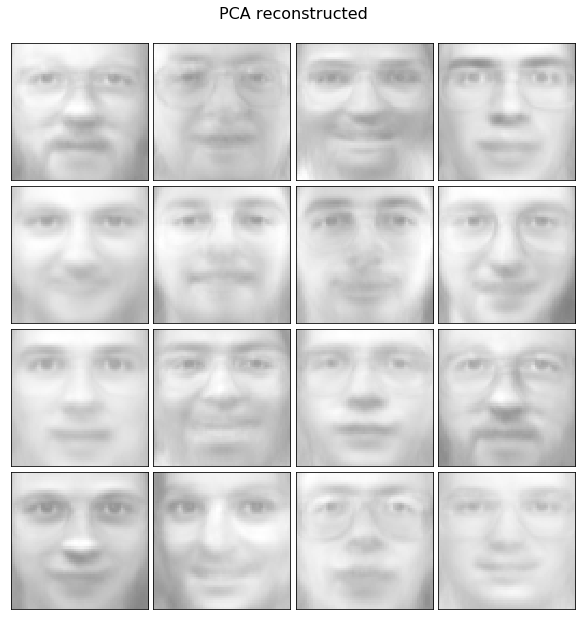

In [60]:
# PCA reconstructions

rec_pca = pca.inverse_transform(pca.transform(faces[:n_components]))
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])
plot_gallery('PCA reconstructed',rec_pca[:n_components])

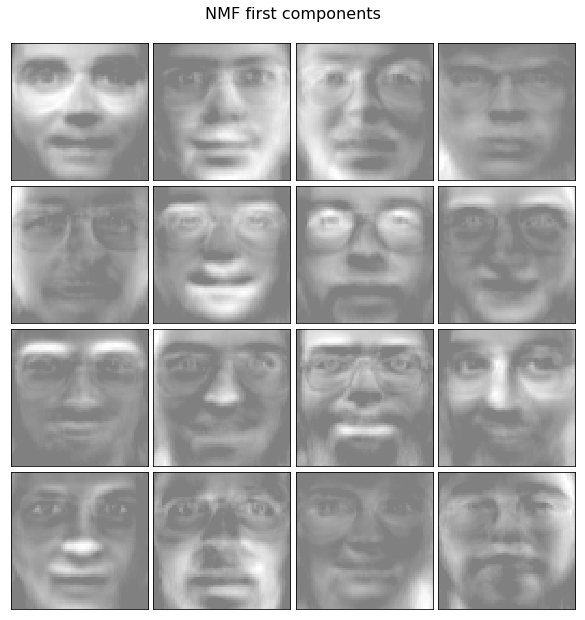

In [61]:
# Now, NMF

nmf = NMF(n_components=n_components)
nmf.fit(faces)
comp = nmf.components_

plot_gallery('NMF first components',comp[:n_components])

In [62]:
# NMF reconstructions

rec_nmf = nmf.inverse_transform(nmf.transform(faces[:n_components]))


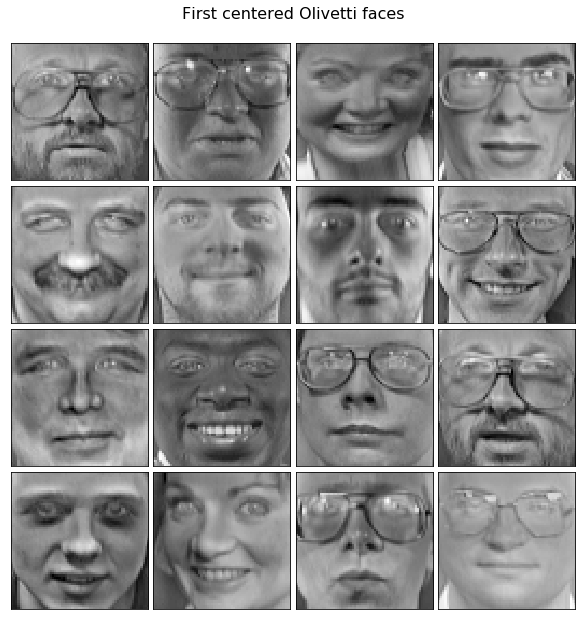

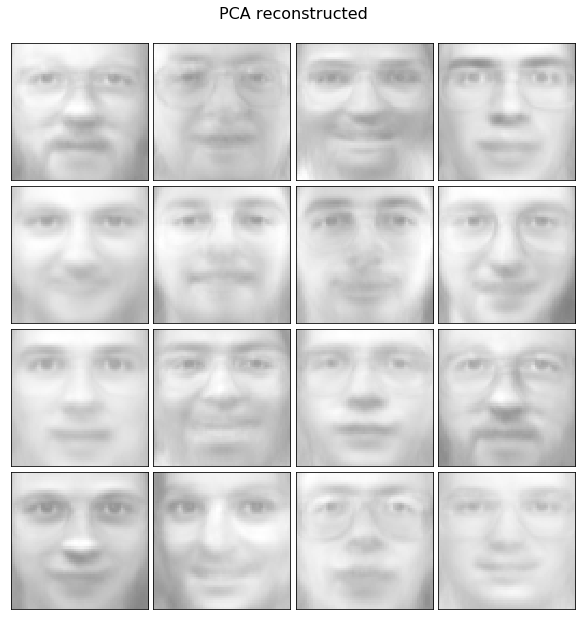

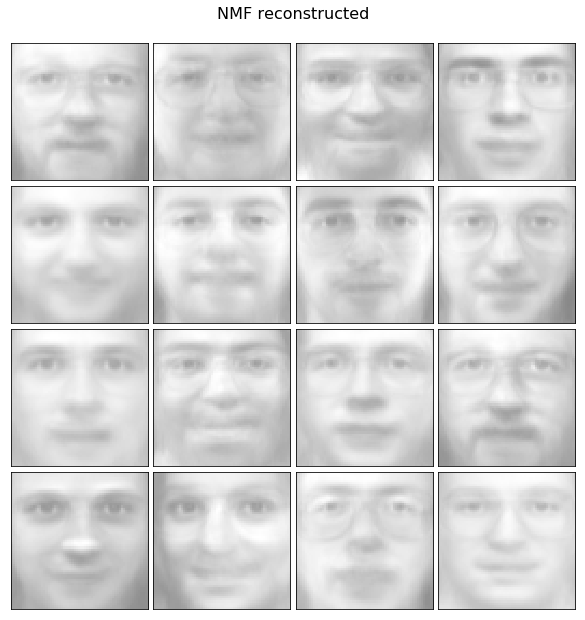

In [63]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])
plot_gallery('PCA reconstructed',rec_pca[:n_components])
plot_gallery('NMF reconstructed',rec_nmf[:n_components])